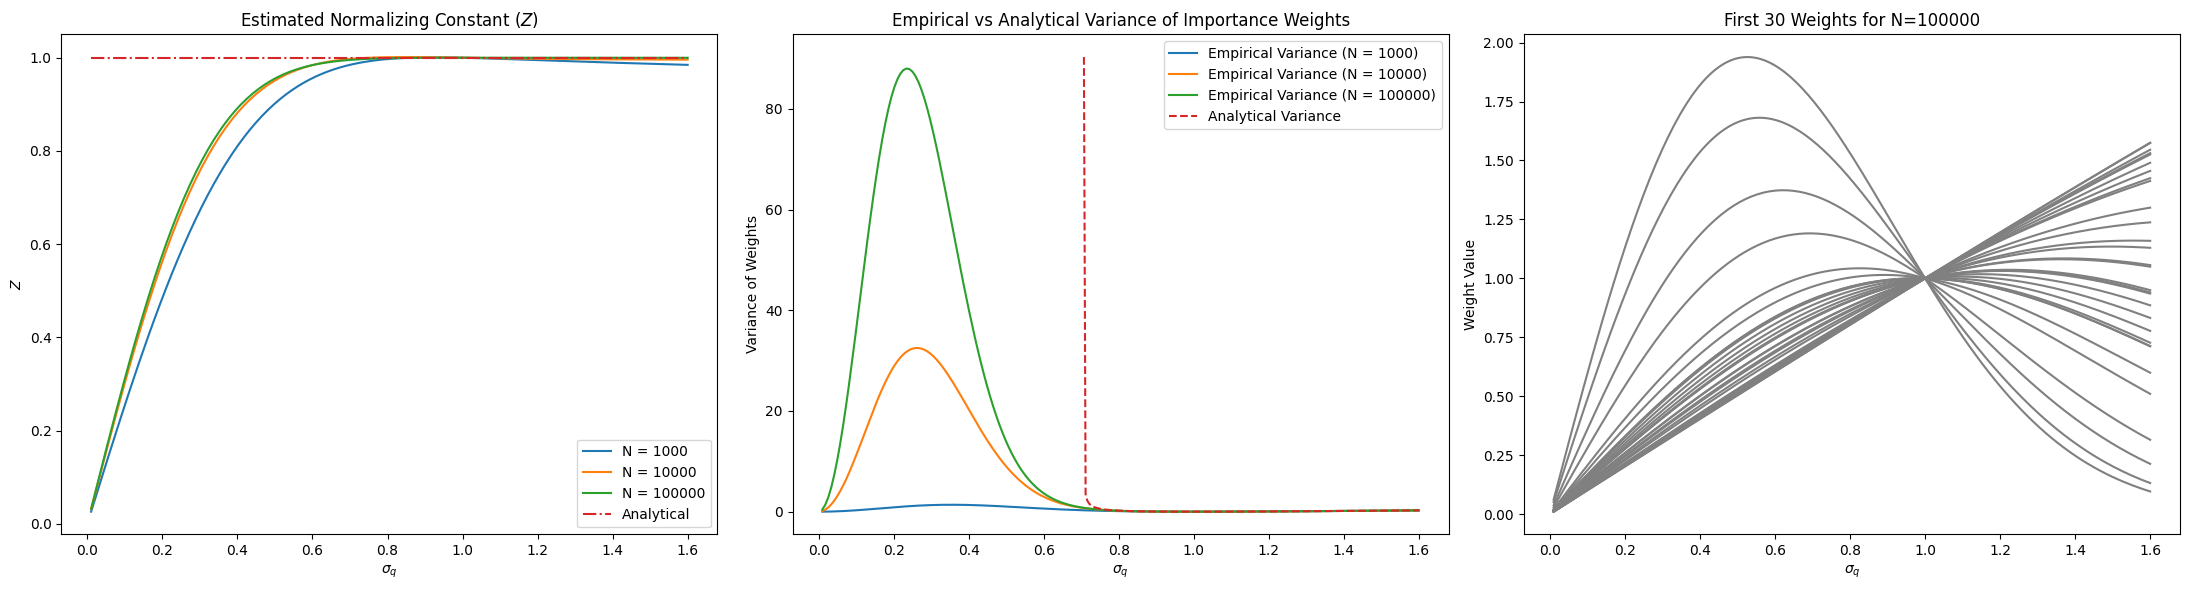

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters
sigma_p = 1
sigma_q_values_anal = np.linspace(np.sqrt(.500015), 1.6, 200) # ;)
sigma_q_values_emp = np.linspace(.01, 1.6, 200)
N_values = [1000, 10000, 100000] # as in figure 29.20

# calculate Z_values and store weights
Z_values = np.zeros((len(sigma_q_values_emp), len(N_values)))
weights_100k = np.zeros((len(sigma_q_values_emp), 30)) # storing first 30 weights for each sigma_q

for i, sigma_q in enumerate(sigma_q_values_emp):
    for j, N in enumerate(N_values):
        np.random.seed(20000)
        sampled_points = np.random.normal(0, sigma_q, N)
        p = (1 / np.sqrt(2 * np.pi)) * np.exp(-sampled_points**2 / 2)
        q = (1 / np.sqrt(2 * np.pi * sigma_q**2)) * np.exp(-sampled_points**2 / (2 * sigma_q**2))
        w = p / q
        Z_values[i, j] = np.mean(w)
        if N == 100000:
            weights_100k[i] = w[:30]

# function to calculate empirical weights
def weight_vectorized(samples, sigma_p, sigma_q):
    return (sigma_q / sigma_p) * np.exp(-samples**2 / 2 * (1/sigma_p**2 - 1/sigma_q**2))

# function to calculate analytical variance
def analytical_variance(sigma_p, sigma_q):
    if 2/sigma_p**2 <= 1/sigma_q**2:
        raise ValueError("Invalid standard deviations: ensure that sigma_q^2 > sigma_p^2 / 2")
    variance = (sigma_q / (sigma_p**2 * np.sqrt(2/sigma_p**2 - 1/sigma_q**2))) - 1
    return variance

# reate subplots
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

# Z-values plot
for i, N in enumerate(N_values):
    axs[0].plot(sigma_q_values_emp, Z_values[:, i], label=f'N = {N}')
ones = np.ones(sigma_q_values_emp.shape[0])
axs[0].plot(sigma_q_values_emp, ones, label='Analytical', linestyle='-.')
axs[0].set_xlabel(r'$\sigma_q$')
axs[0].set_ylabel('$Z$')
axs[0].set_title('Estimated Normalizing Constant ($Z$)')
axs[0].legend()

# empirical and analytical variance plot
for N in N_values:
    empirical_variances = []
    for sigma_q in sigma_q_values_emp:
        np.random.seed(66)
        samples_from_q = np.random.normal(0, sigma_q, N)
        weights = weight_vectorized(samples_from_q, sigma_p, sigma_q)
        empirical_variances.append(np.var(weights))
    axs[1].plot(sigma_q_values_emp, empirical_variances, label=f'Empirical Variance (N = {N})')
analytical_variances = [analytical_variance(sigma_p, sigma_q) for sigma_q in sigma_q_values_anal]
axs[1].plot(sigma_q_values_anal, analytical_variances, label='Analytical Variance', linestyle='--')
axs[1].set_xlabel(r'$\sigma_q$')
axs[1].set_ylabel('Variance of Weights')
axs[1].set_title('Empirical vs Analytical Variance of Importance Weights')
axs[1].legend()

# plot of the first 30 weights for N=100000
for i in range(30):
    axs[2].plot(sigma_q_values_emp, weights_100k[:, i], color = 'grey')
axs[2].set_xlabel(r'$\sigma_q$')
axs[2].set_ylabel('Weight Value')
axs[2].set_title('First 30 Weights for N=100000')

# show plots
plt.tight_layout()
plt.show()
